In [1]:
import os
home=os.environ['HOME']
import sys
sys.path.append(home+'/utokyo-kudohlab/cnn_cpp/src/protos')

In [2]:
import cnn_params_pb2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
d_params = cnn_params_pb2.Params()
f_params = cnn_params_pb2.Params()
h_params = cnn_params_pb2.Params()

In [4]:
try:
  with open(home+"/utokyo-kudohlab/cnn_cpp/data/double_params.pb", "rb") as f:
      d_params.ParseFromString(f.read())
except IOError:
  print ("Could not open file.  Creating a new one.")

In [5]:
d_w1 = np.array(d_params.weights[0].w)
d_b1 = np.array(d_params.biases[0].b)
d_w2 = np.array(d_params.weights[1].w)
d_b2 = np.array(d_params.biases[1].b)
d_w3 = np.array(d_params.weights[2].w)
d_b3 = np.array(d_params.biases[2].b)

In [6]:
f_w1 = d_w1.astype(np.float32)
f_b1 = d_b1.astype(np.float32)
f_w2 = d_w2.astype(np.float32)
f_b2 = d_b2.astype(np.float32)
f_w3 = d_w3.astype(np.float32)
f_b3 = d_b3.astype(np.float32)

In [7]:
h_w1 = d_w1.astype(np.float16)
h_b1 = d_b1.astype(np.float16)
h_w2 = d_w2.astype(np.float16)
h_b2 = d_b2.astype(np.float16)
h_w3 = d_w3.astype(np.float16)
h_b3 = d_b3.astype(np.float16)

In [8]:
def ShowGraph(h, f, d):
    _, (axL, axC, axR) = plt.subplots(ncols=3, figsize=(40, 10), sharex=True, sharey=True)
    axL.hist(h, bins=min(len(h)//5, 100), color='deepskyblue')
    axL.set_title('half')
    axC.hist(f, bins=min(len(f)//5, 100), color='hotpink')
    axC.set_title('float')
    axR.hist(d, bins=min(len(d)//5, 100), color='orange')
    axR.set_title('double')
    plt.show()

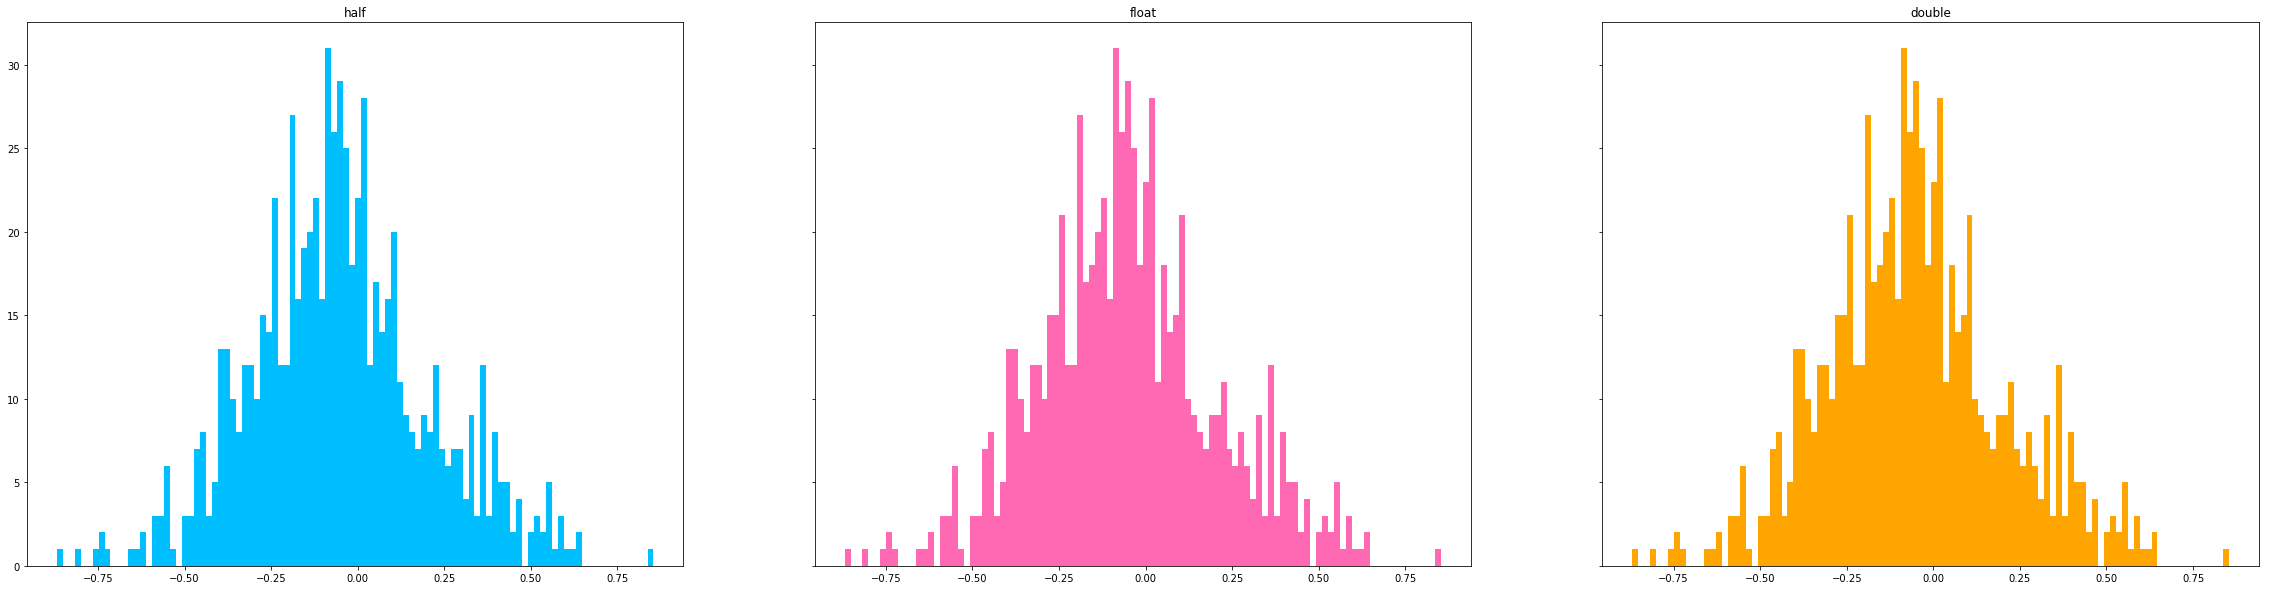

In [9]:
ShowGraph(h_w1, f_w1, d_w1)

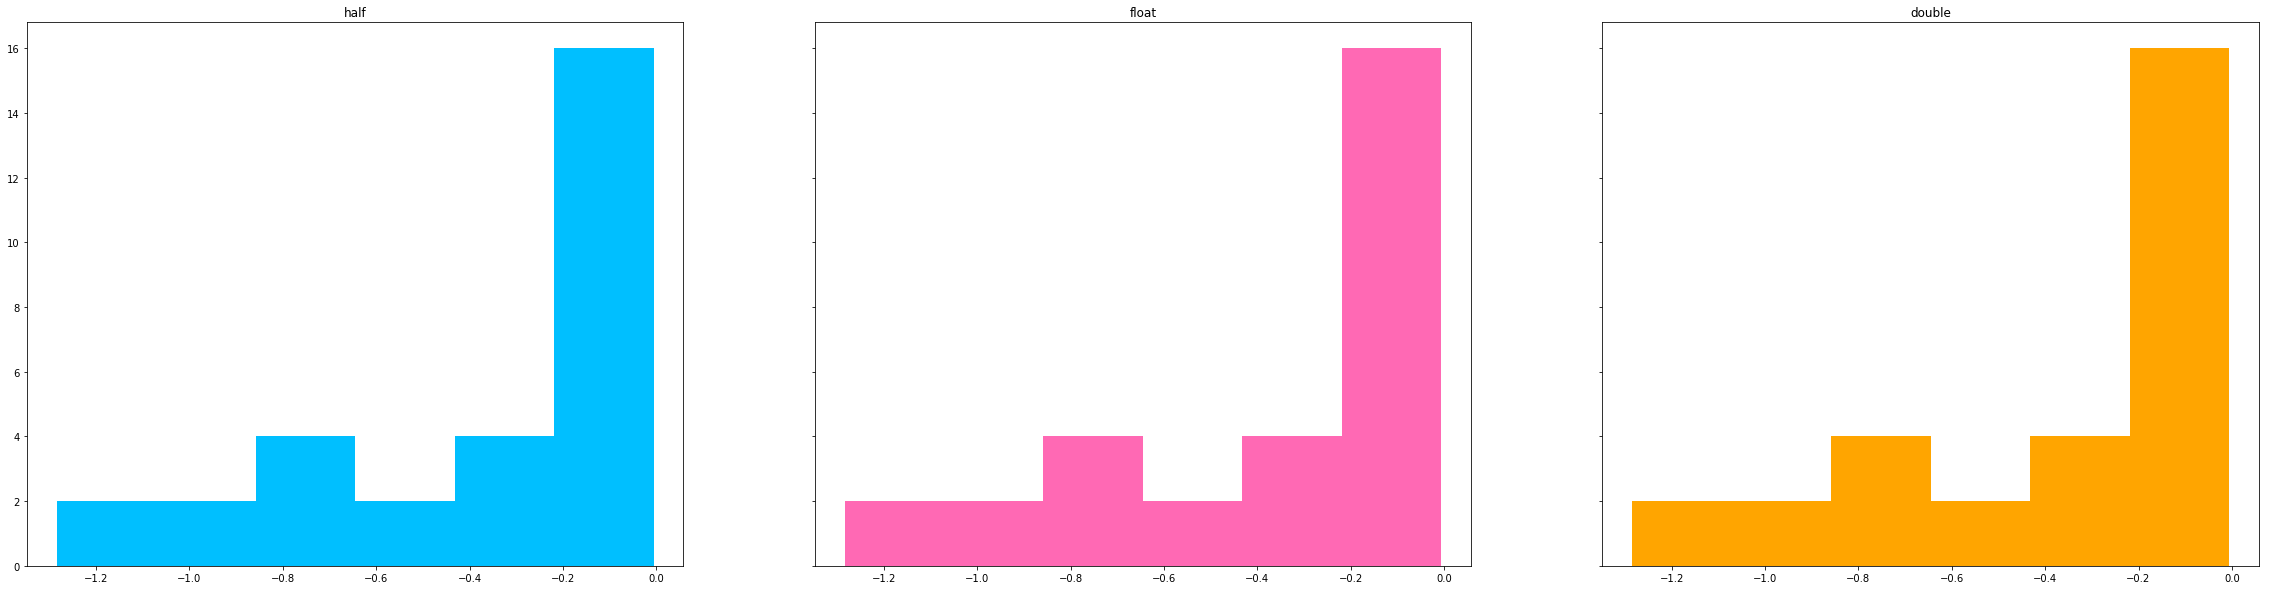

In [10]:
ShowGraph(h_b1, f_b1, d_b1)

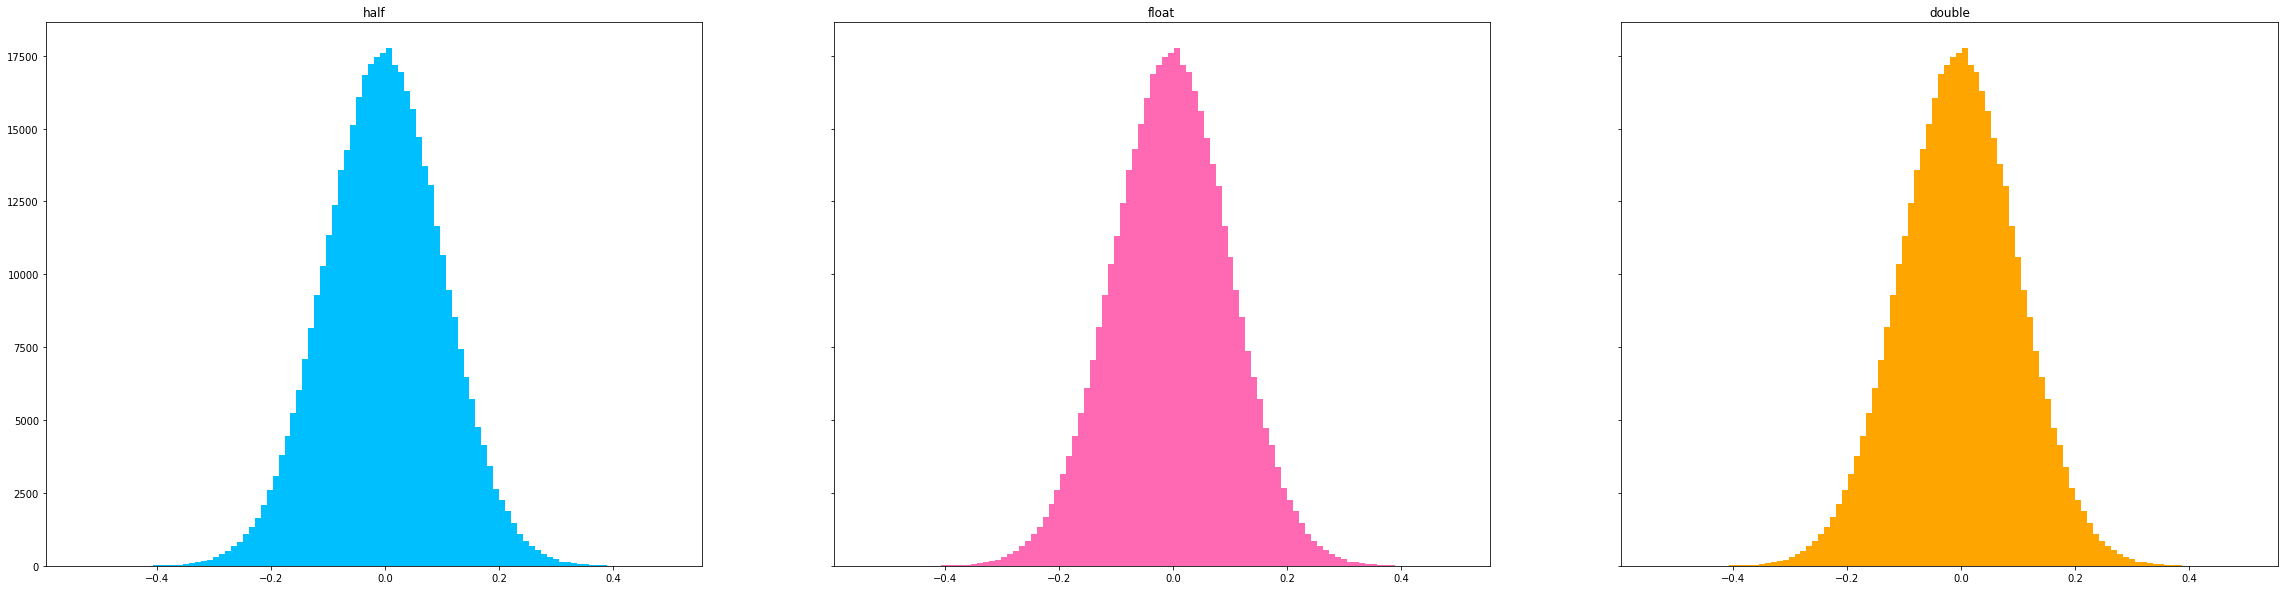

In [11]:
ShowGraph(h_w2, f_w2, d_w2)

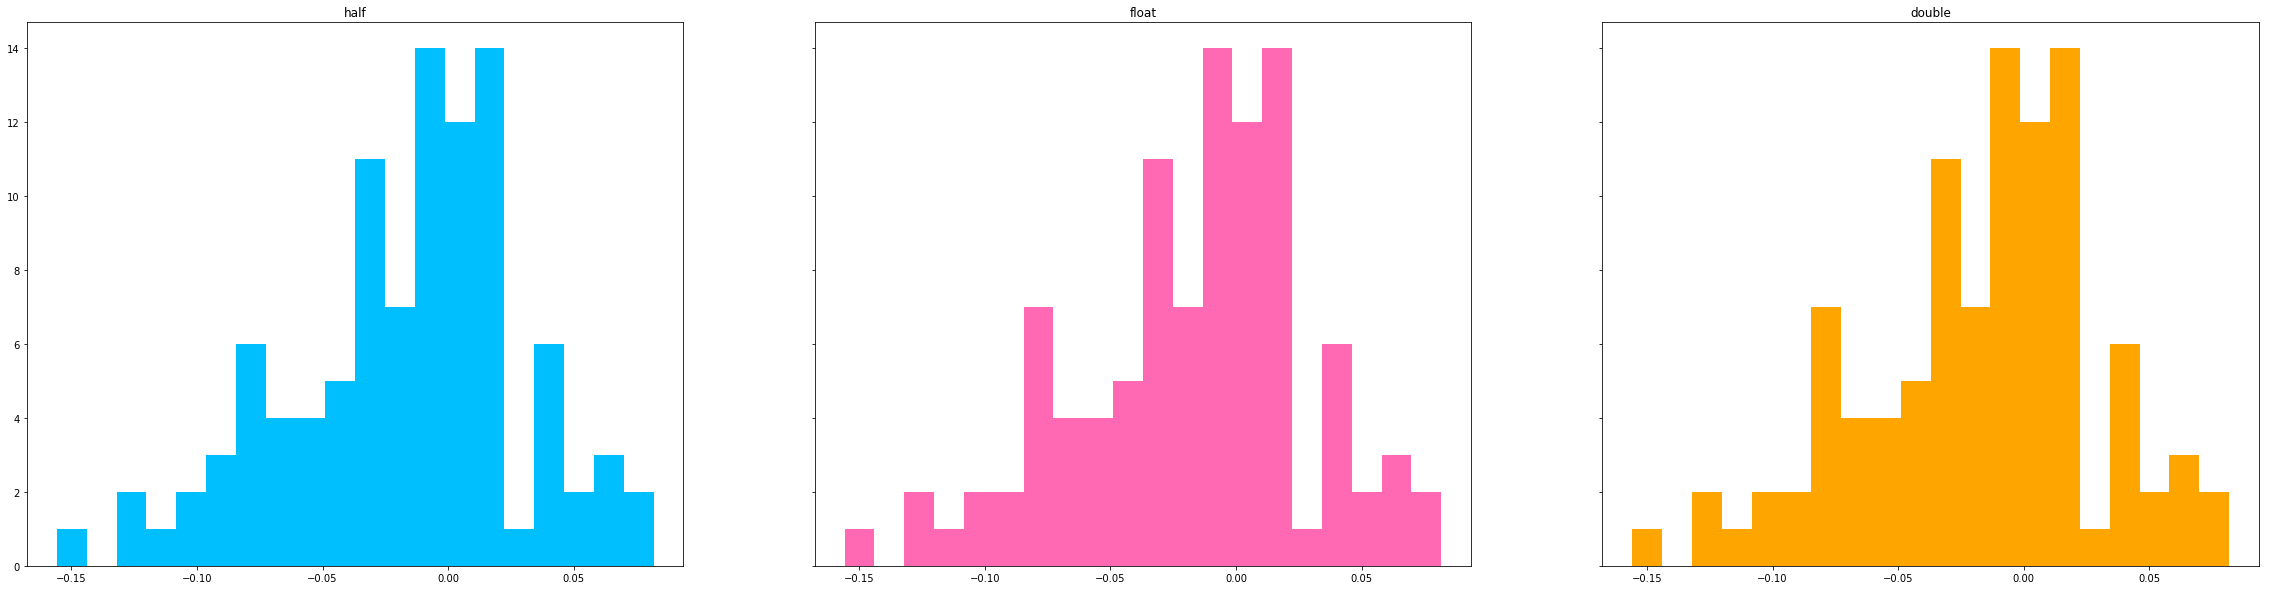

In [12]:
ShowGraph(h_b2, f_b2, d_b2)

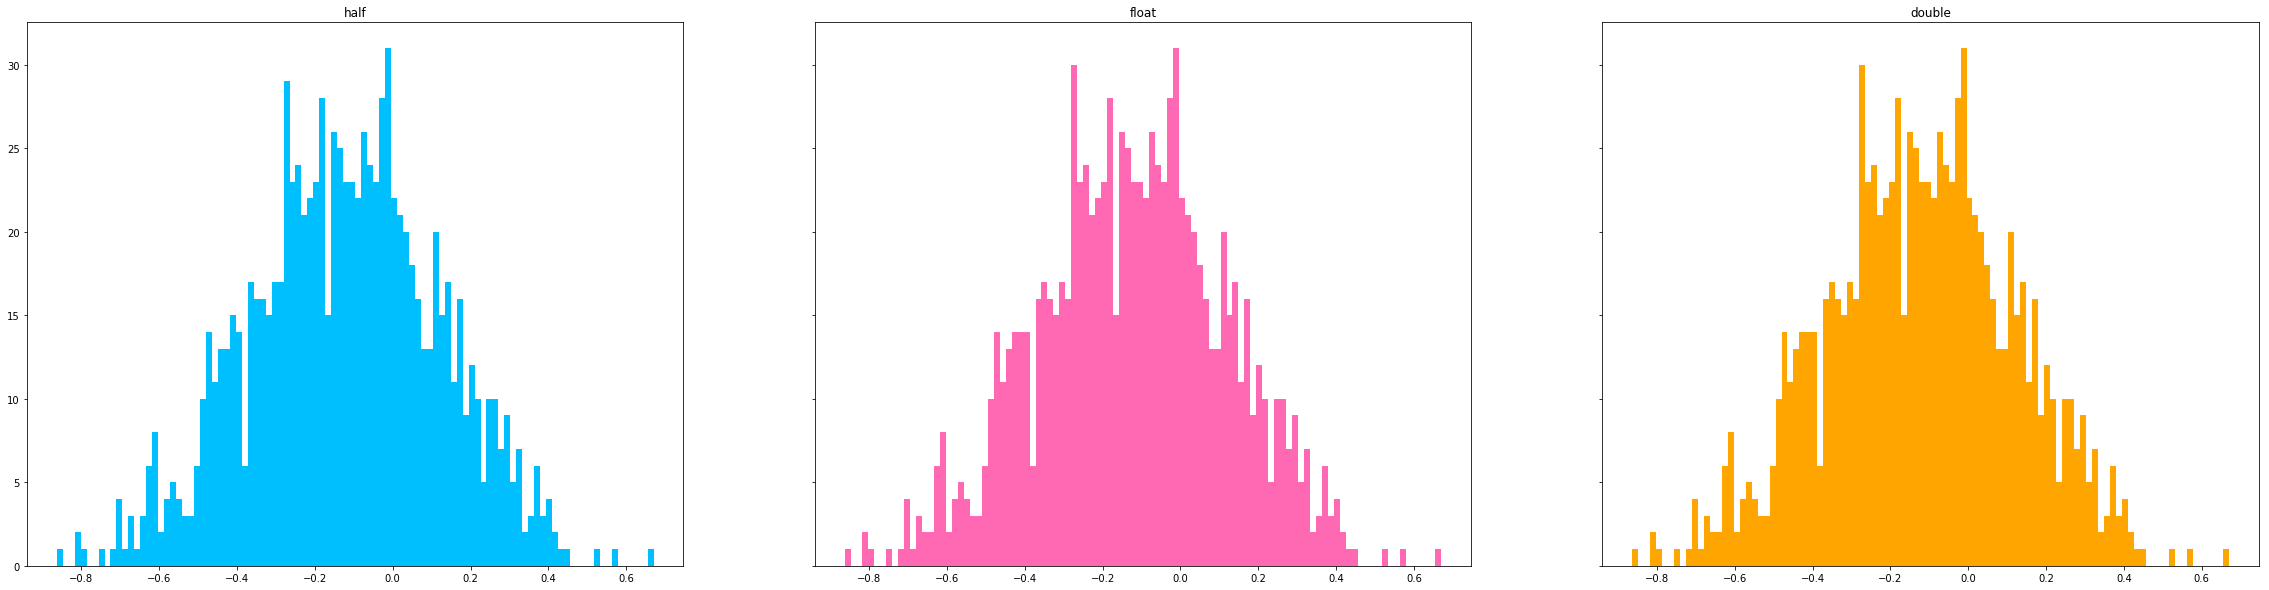

In [13]:
ShowGraph(h_w3, f_w3, d_w3)

In [14]:
np.corrcoef(h_w1, d_w1)[0, 1]

0.99999997853788813

In [15]:
np.corrcoef(f_w1, d_w1)[0, 1]

0.99999999999999956

In [16]:
np.corrcoef(h_w1, f_w1)[0, 1]

0.99999997853772415